In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

import pandas as pd

import py.continuum1d as continuum1d

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, violationType, a_jkValues, lmbd

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

In [3]:
params=None
c1d = continuum1d.continuum1d()

1d Model initialised.


In [4]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def plotActivity(array, xaxis, yaxis, title='Default', colorbar=False):
    
    
    a=array.T[::-1]
    
    fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=120)

    pos = ax.imshow(a, cmap='viridis', aspect='auto', vmin=0, vmax=1, zorder=1, interpolation='none')
    plt.title(title, fontsize=15)
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    #cbar = fig.colorbar(pos, ax=ax2, extend='both')
    
    nmb_labels = 5
                
    idx_x = np.round(np.linspace(0, len(xaxis) - 1, nmb_labels)).astype(int)
    idx_y = np.round(np.linspace(0, len(yaxis) - 1, nmb_labels)).astype(int)
        
    xliste=xaxis[idx_x]
    yliste=yaxis[idx_y[::-1]]
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels, fontsize=15)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels, fontsize=15)
        
    ax.set(xlabel='time', ylabel='x')
        
    ax.label_outer()
    

    if colorbar:
        cbar_ticks=np.linspace(0,1,nmb_labels)
      #  cbar_ticks=np.around(cbar_ticks, decimals=0)
        
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel(r'$max.\ u_e$', rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_ticks)
        
        
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
  #  cbar.minorticks_on()


    
    plt.show()

In [74]:
ee = -0.36 #-0.6
ii = -0.93 #-0.85
#params={'I_e': ee, 'I_i': ii, 'b': 0.5, 'end_t': 20*1000, 'tau_a': 1000}#, 'tau_i': 0.6, 'sigma_i': 0.6, 'dt': 0.01}

params={'I_e': -0.2, 'I_i': -0.4542, 'b': 0, 'end_t':10*1000, 'sigma_i': 3.2825, 'tau_i': 2.4475}

ps = setParams(params)
fps = computeFPs(ps)
print(fps)
stab = checkFixPtsStability(fps, ps)
print(stab)

k=np.linspace(-3,3,51)

a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)
vio, k = violationType(k, a_ee, a_ei, a_ie, a_ii, ps)

#print('fixed points %s ' %str(fps))
#print('with (mass) stability %s'  %str(stab))
vio

[[0.12506086 0.22664058]]
[0]


1

In [75]:
fp = fps[0]
#fp = np.array([0.0, 0.01])

In [76]:
ue, ui = c1d.run(ps, itype='inte_adaptation', fp=fp)

In [77]:
x = np.roll(np.fft.fftshift(ps.x), -1)[::-1]
time = ps.time * (1/1000)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1394/99290923.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels, fontsize=15)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1394/99290923.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels, fontsize=15)


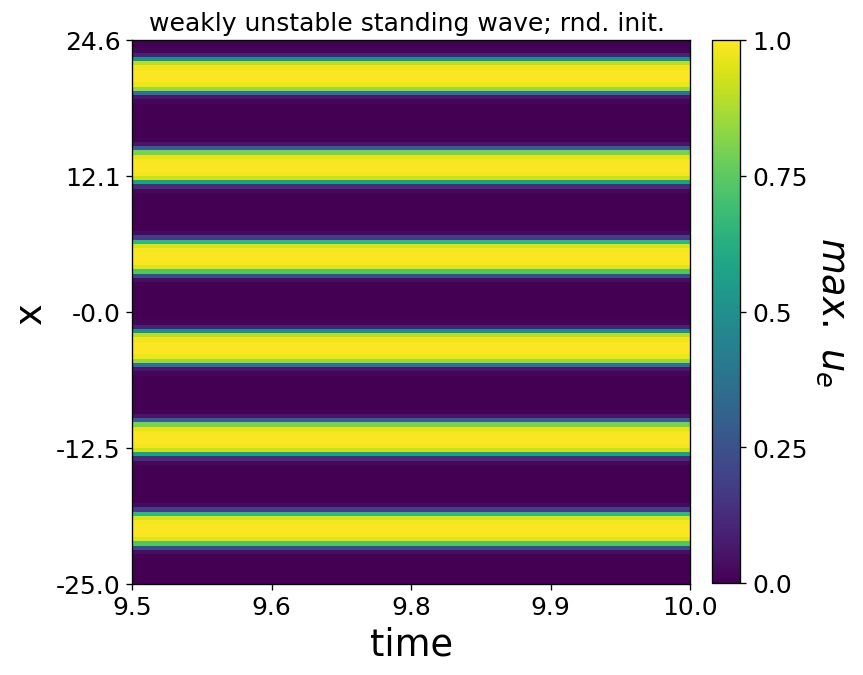

In [78]:
plotActivity(ue[-5000:,:], xaxis=time[-5000:], yaxis=x, 
             title = 'weakly unstable standing wave; rnd. init. ', colorbar = True) #

In [164]:
df = pd.read_csv('default_space_frequs.csv')

str = 'up_space'

df[str][np.isinf(df[str])]=0
df[str][df[str].isnull()]=0

a = max(df[str])
#df[max(df['up_duration'])]
df[df[str]==a] = 0

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3266/3278724353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][np.isinf(df[str])]=0
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_3266/3278724353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str][df[str].isnull()]=0


In [302]:
a = max(df[str])
#df[max(df['up_duration'])]
df[df[str]==a] = 0

In [303]:
a = max(df[str])
#df[max(df['up_duration'])]
df[df[str]==a] 

,Unnamed: 0,I_e,I_i,dom_frequ,up_space,down_space
785,0,0.800000,0.488889,1.0,46.484375,3.515625
790,0,0.844444,0.533333,1.0,46.484375,3.515625


In [323]:
df[df['I_i']>=-0.1]

,Unnamed: 0,I_e,I_i,dom_frequ,up_space,down_space
636,0,0.311111,-0.088889,7.0,3.627232,3.515625
654,0,0.355556,-0.088889,7.0,3.794643,3.348214
671,0,0.400000,-0.088889,6.0,4.817708,3.515625
672,0,0.400000,-0.044444,7.0,3.850446,3.292411
685,0,0.444444,-0.088889,6.0,5.078125,3.255208
...,...,...,...,...,...,...
793,0,0.888889,0.444444,0.0,0.000000,inf
794,0,0.888889,0.488889,4.0,12.500000,0.000000
795,0,0.888889,0.533333,5.0,10.000000,0.000000
796,0,0.000000,0.000000,0.0,0.000000,0.000000


In [29]:
df1 = pd.read_csv('csv/default.csv')
df2 = pd.read_csv('csv/adap_b05_taua600.csv')
df2 = df2[df2['I_i']>-1]

In [30]:
a = df2[df1['stability']==1]
a[a['p_random']==4]#!=a['p_down']]

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4151/1635875877.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df2[df1['stability']==1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [536]:
b = df1[df1['I_e']>=-0.37]
b = b[b['I_e']<=-0.3]
b = b[b['I_i']>=-0.95]
b = b[b['I_i']<=-0.9]
b

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
3391,0,-0.355556,-0.933333,0,0,2,3,NaN
3482,0,-0.311111,-0.933333,0,0,2,3,NaN
